# Olasılık
> Makine Öğrenmesi ve Derin Öğrenme için gerekli olasılık konuları.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

Makine Öğrenmesi tamamen tahminler üretme işidir. Örneğin klinik geçmişi göz önüne alındığında, bir hastanın gelecek yıl kalp krizi geçirme *olasılığını* tahmin etmek isteyebiliriz. Anormallik tespitinde, bir uçağın jet motorundan gelen bir dizi okumanın normal çalışma için ne kadar *olası* olduğunu değerlendirmek isteyebiliriz. Pekiştirmeli öğrenmede, robotun ya da daha genel olarak etmenin bir ortamda akıllıca davranmasını isteriz. Bunun anlamı, mevcut eylemlerin her biri altında yüksek bir ödül alma olasılığını düşünmemiz gerektiğidir. Tavsiye sistemleri inşa ettiğimizde de olasılıkları düşünmemiz gerekir. Örneğin, büyük bir online kitapçı için çalıştığımızı varsayalım. Belirli bir kullanıcının belirli bir kitabı satın alma olasılığını tahmin etmek isteyebiliriz. Tüm bu durumlar için olasılık dilini kullanmalıyız. Bir çok kurs, ana bilim dalları, tezler, kariyerler ve hatta bölümler olasılık bilimine üzerine kurulmuştur. Doğal olarak, bu bölümdeki amacımız tüm olasılık konularını öğretmek değildir. Bunun yerine sıfırdan, size ilk derin öğrenme modellerinizi oluşturmaya başlayabileceğiniz kadar olasılık bilgisi öğretmeyi ve isterseniz konunun kendi kendinize keşfetmeye başlayabileceğiniz kadarlık özünü kavratmak istiyoruz.

Açık açık ifade etmesek veya somut örnekler vermesek de, önceki bölümlerde olaslığı kullandık. Şimdi ilk örneğimizle başlayaşım: kedi ve köpekleri fotoğraflardan ayırt etmek. Bu basit gelebilir ama aslında zor bir problemdir. Sorunun zorluğu ilk planda görüntünün çözünürlüğüne bağlı olabilir.

![Images of varying resolutions ($10 \times 10$, $20 \times 20$, $40 \times 40$, $80 \times 80$, and $160 \times 160$ pixels).](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/cat_dog_pixels.png?raw=1)

Şekilde görüldüğü gibi, $160 \times 160$ piksel çözünürlüğe sahip resimlerde kedi ve köpekleri seçmek bizim için kolay olsa da, $40 \times 40$ piksel için zor hata $10 \times 10$ piksel için imkansızdır. Diğer bir ifadeyle, uzaklaştıkça yani çözünürlük azaldıkça kedi ve köpek resimlerini ayırt etmemiz yazı-tura atmaya dönüşmeye başlar. Olasılık sayesinde belirsizlik düzeyini matematiksel olarak ifade edebiliriz. Eğer resmim kedi resmi olduğundan tam olarak eminsek, resme karşılık gelen $y$ etiketinin "kedi" olma olasılığı yani $P(y=$ "kedi"$)$  ifadesi $1$ sayısına eşittir deriz. Fakat $y =$ "kedi" veya that $y =$ "köpek" diyebilmek için herhangi bir bulgu yok ise, olasılıkların eşit olduğunu söyler ve bunu $P(y=$ "kedi"$) = P(y=$ "köpek"$) = 0.5$ şeklinde gösteririz. Eğer resmin kedi resminden olduğu yüksek ihtimal ise fakat kesin emin değilsek, olasılığı $0.5  < P(y=$ "kedi"$) < 1$ gibi bir değer olarak tahmin ederiz.

Şimdi diğer bir örnek verelim. Hava durumu izleme verilerinden yarın İstanbul'da yağmur yağma olaslığını tahmin etmek istiyoruz. Yaz aylarındaysak yağmur yaklaşık 0.5 olasılıkla yağar.

İki örnekte de bir şeyin alacağı değerle ilgileniyoruz. Ayrıca ikisinde de sonuçtan kesin emin değiliz. Fakat iki durum arasında kritik bir farklılık var. İlk durumda resim ya kedidir ya da köpektir ve hangisi olduğunu kesin bilmiyoruz. İkinci durumda sonuç rastgele bir olay gibi görülebilir. Dolayısıyla olasılık, belirsizliğin esnek dilidir ve birçok farklı durumda etkin bir şekilde kullanılabilir.       

## Temel Olasılık Kuramı

Bir zar atalım ve gelen sayının 1 rakamı olma ihtimalini hesaplayalım. Eğer düzgün bir zar ise, 1'den 6'ya kadar olan tüm sonuçlar aynı şansa sahiptir ve dolayısıyla altıda bir oranında 1 rakamı gelir. Daha matematiksel olarak, 1 gelme olasılığının $\frac{1}{6}$ olduğunu söyleriz.  

Fabirakadan yeni çıkmış bir zarın düzgün mü değil mi olduğunu öğrenmek isteyebiliriz. Bunu öğrenmenin tek yolu zarı defalarca atmak ve sonuçları kaydetmektir. Her atışta 1 ile 6 arasında bir sonuç elde ederiz. Bu sonuçlardan her bir rakamın olasılığını bulalım. 

En basit yol her bir rakamın kaç defa geldiğini saymak ve bunu toplam atış sayısına oranlamaktır. Bu süreç belirlediğimiz *olay* için (mesela 1 gelmesi olayı) olasığı *tahmin* etmemizi sağlar. İstatistikteki *Büyük Sayılar Yasası* gereği, daha çok zar attıkça elde ettiğimiz oranlar gerçek olasılığa doğru yaklaşır. Ayrıntıya girmden önce bir deneme yapalım.  

Önce gerekli olan kütüphaneleri yükleyelim. 

In [0]:
!pip install d2l==0.13.2 -f https://d2l.ai/whl.html # installing d2l
!pip install -U mxnet-cu101mkl==1.6.0  # updating mxnet to at least v1.6

Şimdide kullanacağımız araçları ve paket programları çağıralım.

In [0]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import np, npx
import random
npx.set_np()

Şimdi zar atma işini programla yapmak istiyoruz. İstatistikte buna olasılık dağılımından *örneklem* alma denir. Belli sayıda seçeneğe karşılık gelen olasılıkları veren dağılıma *çokterimli dağılım* (multinomial distribution) denir. İleride *dağılım* kavramı daha net açıklanacaktır ama şimdilik bunu olaylara olasılık eşleme olarak düşünebilirsiniz. 


MXNet ile çokterimli dağılımdan örneklem almak için `np.random.multinomial` fonksiyonunu kullanıyoruz. Bu fonksiyonu farklı şekillerde yükleyip kullanabilirsiniz, biz en kolayını tercih edeceğiz. 

Öncelikle `np.random.multinomial` fonksiyonunun verdiği vektörü ele alalım. Bu vektörün bileşenleri, bu blieşene karşılık gelen sonucun kaç defa elde edildiğini gösterir. Mesela zar atmada, $6$ bileşenli bir vektör vardır ve ilk bileşen $1$ rakamının kaç defa geldiğini, benzer şekilde $i$ bileşeni $i$ sonucunun kaç defa geldiğini gösterir.  

Zarı 1 defa atalım.

In [20]:
fair_probs = [1.0 / 6] * 6
np.random.multinomial(1, fair_probs)

array([0, 0, 1, 0, 0, 0], dtype=int64)

Bunu defalarca çalıştırırsanız her seferinde rastgele sonuçlar elde edersiniz. Zarın düzgün olu olmadığını anlamak için bu dağılımdan birçok örneklem almalıyız. Mesela 10 zar atmak için `for` döngüsü yerine aşağıdakini kullanırız ve birbirinden bağımsız 10 sonucu aynı anda elde etmiş oluruz. 

In [21]:
np.random.multinomial(10, fair_probs)

array([3, 2, 2, 0, 2, 1], dtype=int64)

Ayrıca bu deneyi örneği aynı anda 3 defa yapabiliriz. 

In [22]:
counts = np.random.multinomial(10, fair_probs, size=3)
counts

array([[1, 2, 3, 1, 1, 2],
       [2, 2, 3, 1, 1, 1],
       [3, 3, 1, 1, 1, 1]], dtype=int64)

Şimdi zarı 1000 defa atalım ve herbir sonucun gelme oranının bulalım. Bu sayede olasılıkları tahmin etmiş olacağız.

In [24]:
# Sonuçları 32 bit boyutunda ondalıklı bilgisayar sayıları olarak kaydedelim.
counts = np.random.multinomial(1000, fair_probs).astype(np.float32)
counts / 1000  # Oranlar 

array([0.135, 0.183, 0.163, 0.186, 0.164, 0.169])

Düzgün bir zardan örneklem aldığımız için herbir sonucun gerçek olasılığının $\frac{1}{6}$ veya yaklaşık $0.167$ olduğunu biliyoruz. Dolayısıyla tahminimiz oldukça iyi görünüyor.  

Bu tahminlerin örneklem boyutu ve sayısı arttıkça gerçek olasılığa nasıl yaklaştığını görselleştirelim. Örneklem boyutu 10 olan 500 deneyin sonuçlarının gerçek olasılığa nasıl yaklaştığını görelim.

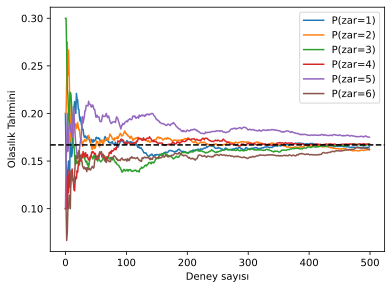

In [25]:
counts = np.random.multinomial(10, fair_probs, size=500)
cum_counts = counts.astype(np.float32).cumsum(axis=0)
estimates = cum_counts / cum_counts.sum(axis=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].asnumpy(),
                 label=("P(zar=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Deney sayısı')
d2l.plt.gca().set_ylabel('Olasılık Tahmini')
d2l.plt.legend();

Yukarıdaki şekilde sürekli eğriler zarın herbir yüzüne karşılık gelen olasılık tahmininin deney sayısına göre değişimini veriyor. Kesikli çizgi de gerçek olasılığı gösteriyor ve görüldüğü gibi sürekli eğriler buna doğru yaklaşıyor.

### Olasılık Kuramının Aksiyomları

Zar atma ile ilgili çalışırken $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$ kümesine *öneklem uzayı*, herbir elemana *çıktı* veya *sonuç* diyoruz. Bazı sonuçlardan oluşan bir kümeye *olay* denir. Örneğin $5$ gelmesi yani $\{5\}$ 
olayı veya tek sayı gelmesi yani $\{1, 3, 5\}$ olayı gibi. Eğer gözlem sonucu $\mathcal{A}$ kümesinde yer alıyorsa bu $\mathcal{A}$ olayı gerçeklşmiş olur. Mesala eğer zar $3$ gelmiş ise, *tek sayı gelmesi olayı* gerçekleşmiş olur çünkü $3 \in \{1, 3, 5\}$ sağlanır.   

Matematiksel olarak *olasılık*, kümelere reel sayı karşılık getiren bir fonksiyon olarak tanımlanır. $\mathcal{S}$ örneklem uzayındaki bir $\mathcal{A}$ olayının olasılığı $P(\mathcal{A})$ ile gösterilir ve aşağıdaki özellikleri sağlar.  

* Herhangi bir $\mathcal{A}$ olayının olasılığı negatif olamaz, yani $P(\mathcal{A}) \geq 0$;
* Öreklem uzayının olasılığı $1$ olmalıdır, yani $P(\mathcal{S}) = 1$;
* *Karşılıklı ayrık* olan yani $i \neq j$ için $\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$ biçimindeki sayılabilir çoklukta $\mathcal{A}_1, \mathcal{A}_2, \ldots$ olayları için herhangi birisinin gerçekleşmesi olasılığı olasılıklarının toplamına eşittir, yani $P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$.

Bunlara olasılık kuramının aksiyomları denir ve Kolmogorov tarafından 1930'da tanımlanmıştır. Bu sağlam temeller sayesinde rastgelelik ile ilgili felsefi tartışmalardan kurtulup matematiksel araçlarla çalışabilir ve yeni sonuçlar elde edebiliriz. Mesela $\mathcal{A}_1$ olayını örneklem uzayının tamamı ve diğer her $i > 1$ için $\mathcal{A}_i = \emptyset$ olarak alırsak, $P(\emptyset) = 0$ buluruz, yani boş kümenin olasılığı sıfırdır.  

### Rassal Değişkenler



In our random experiment of casting a die, we introduced the notion of a *random variable*. A random variable can be pretty much any quantity and is not deterministic. It could take one value among a set of possibilities in a random experiment.
Consider a random variable $X$ whose value is in the sample space $\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$ of rolling a die. We can denote the event "seeing a $5$" as $\{X = 5\}$ or $X = 5$, and its probability as $P(\{X = 5\})$ or $P(X = 5)$.
By $P(X = a)$, we make a distinction between the random variable $X$ and the values (e.g., $a$) that $X$ can take.
However, such pedantry results in a cumbersome notation.
For a compact notation,
on one hand, we can just denote $P(X)$ as the *distribution* over the random variable $X$:
the distribution tells us the probability that $X$ takes any value.
On the other hand,
we can simply write $P(a)$ to denote the probability that a random variable takes the value $a$.
Since an event in probability theory is a set of outcomes from the sample space,
we can specify a range of values for a random variable to take.
For example, $P(1 \leq X \leq 3)$ denotes the probability of the event $\{1 \leq X \leq 3\}$,
which means $\{X = 1, 2, \text{or}, 3\}$. Equivalently, $P(1 \leq X \leq 3)$ represents the probability that the random variable $X$ can take a value from $\{1, 2, 3\}$.

Note that there is a subtle difference between *discrete* random variables, like the sides of a die, and *continuous* ones, like the weight and the height of a person. There is little point in asking whether two people have exactly the same height. If we take precise enough measurements you will find that no two people on the planet have the exact same height. In fact, if we take a fine enough measurement, you will not have the same height when you wake up and when you go to sleep. So there is no purpose in asking about the probability
that someone is 1.80139278291028719210196740527486202 meters tall. Given the world population of humans the probability is virtually 0. It makes more sense in this case to ask whether someone's height falls into a given interval, say between 1.79 and 1.81 meters. In these cases we quantify the likelihood that we see a value as a *density*. The height of exactly 1.80 meters has no probability, but nonzero density. In the interval between any two different heights we have nonzero probability.
In the rest of this section, we consider probability in discrete space.
For probability over continuous random variables, you may refer to :numref:`sec_random_variables`.

## Dealing with Multiple Random Variables

Very often, we will want to consider more than one random variable at a time.
For instance, we may want to model the relationship between diseases and symptoms. Given a disease and a symptom, say "flu" and "cough", either may or may not occur in a patient with some probability. While we hope that the probability of both would be close to zero, we may want to estimate these probabilities and their relationships to each other so that we may apply our inferences to effect better medical care.

As a more complicated example, images contain millions of pixels, thus millions of random variables. And in many cases images will come with a
label, identifying objects in the image. We can also think of the label as a
random variable. We can even think of all the metadata as random variables
such as location, time, aperture, focal length, ISO, focus distance, and camera type.
All of these are random variables that occur jointly. When we deal with multiple random variables, there are several quantities of interest.

### Joint Probability

The first is called the *joint probability* $P(A = a, B=b)$. Given any values $a$ and $b$, the joint probability lets us answer, what is the probability that $A=a$ and $B=b$ simultaneously?
Note that for any values $a$ and $b$, $P(A=a, B=b) \leq P(A=a)$.
This has to be the case, since for $A=a$ and $B=b$ to happen, $A=a$ has to happen *and* $B=b$ also has to happen (and vice versa). Thus, $A=a$ and $B=b$ cannot be more likely than $A=a$ or $B=b$ individually.


### Conditional Probability

This brings us to an interesting ratio: $0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$. We call this ratio a *conditional probability*
and denote it by $P(B=b \mid A=a)$: it is the probability of $B=b$, provided that
$A=a$ has occurred.

### Bayes' theorem

Using the definition of conditional probabilities, we can derive one of the most useful and celebrated equations in statistics: *Bayes' theorem*.
It goes as follows.
By construction, we have the *multiplication rule* that $P(A, B) = P(B \mid A) P(A)$. By symmetry, this also holds for $P(A, B) = P(A \mid B) P(B)$. Assume that $P(B) > 0$. Solving for one of the conditional variables we get

$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

Note that here we use the more compact notation where $P(A, B)$ is a *joint distribution* and $P(A \mid B)$ is a *conditional distribution*. Such distributions can be evaluated for particular values $A = a, B=b$.

### Marginalization

Bayes' theorem is very useful if we want to infer one thing from the other, say cause and effect, but we only know the properties in the reverse direction, as we will see later in this section. One important operation that we need, to make this work, is *marginalization*.
It is the operation of determining $P(B)$ from $P(A, B)$. We can see that the probability of $B$ amounts to accounting for all possible choices of $A$ and aggregating the joint probabilities over all of them:

$$P(B) = \sum_{A} P(A, B),$$

which is also known as the *sum rule*. The probability or distribution as a result of marginalization is called a *marginal probability* or a *marginal distribution*.


### Independence

Another useful property to check for is *dependence* vs. *independence*.
Two random variables $A$ and $B$ being independent
means that the occurrence of one event of $A$
does not reveal any information about the occurrence of an event of $B$.
In this case $P(B \mid A) = P(B)$. Statisticians typically express this as $A \perp  B$. From Bayes' theorem, it follows immediately that also $P(A \mid B) = P(A)$.
In all the other cases we call $A$ and $B$ dependent. For instance, two successive rolls of a die are independent. In contrast, the position of a light switch and the brightness in the room are not (they are not perfectly deterministic, though, since we could always have a broken light bulb, power failure, or a broken switch).

Since $P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$ is equivalent to $P(A, B) = P(A)P(B)$, two random variables are independent if and only if their joint distribution is the product of their individual distributions.
Likewise, two random variables $A$ and $B$ are *conditionally independent* given another random variable $C$
if and only if $P(A, B \mid C) = P(A \mid C)P(B \mid C)$. This is expressed as $A \perp B \mid C$.

### Application
:label:`subsec_probability_hiv_app`

Let us put our skills to the test. Assume that a doctor administers an AIDS test to a patient. This test is fairly accurate and it fails only with 1% probability if the patient is healthy but reporting him as diseased. Moreover,
it never fails to detect HIV if the patient actually has it. We use $D_1$ to indicate the diagnosis ($1$ if positive and $0$ if negative) and $H$ to denote the HIV status ($1$ if positive and $0$ if negative).
:numref:`conditional_prob_D1` lists such conditional probabilities.

:Conditional probability of $P(D_1 \mid H)$.

| Conditional probability | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_1 = 1 \mid H)$|            1 |         0.01 |
|$P(D_1 = 0 \mid H)$|            0 |         0.99 |
:label:`conditional_prob_D1`

Note that the column sums are all 1 (but the row sums are not), since the conditional probability needs to sum up to 1, just like the probability. Let us work out the probability of the patient having AIDS if the test comes back positive, i.e., $P(H = 1 \mid D_1 = 1)$. Obviously this is going to depend on how common the disease is, since it affects the number of false alarms. Assume that the population is quite healthy, e.g., $P(H=1) = 0.0015$. To apply Bayes' theorem, we need to apply marginalization and the multiplication rule to determine

$$\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}
$$

Thus, we get

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.$$

In other words, there is only a 13.06% chance that the patient
actually has AIDS, despite using a very accurate test.
As we can see, probability can be counterintuitive.

What should a patient do upon receiving such terrifying news? Likely, the patient
would ask the physician to administer another test to get clarity. The second
test has different characteristics and it is not as good as the first one, as shown in :numref:`conditional_prob_D2`.


:Conditional probability of $P(D_2 \mid H)$.

| Conditional probability | $H=1$ | $H=0$ |
|---|---|---|
|$P(D_2 = 1 \mid H)$|            0.98 |         0.03 |
|$P(D_2 = 0 \mid H)$|            0.02 |         0.97 |
:label:`conditional_prob_D2`

Unfortunately, the second test comes back positive, too.
Let us work out the requisite probabilities to invoke Bayes' theorem
by assuming the conditional independence:

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 0) \\
=& P(D_1 = 1 \mid H = 0) P(D_2 = 1 \mid H = 0)  \\
=& 0.0003,
\end{aligned}
$$

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1 \mid H = 1) \\
=& P(D_1 = 1 \mid H = 1) P(D_2 = 1 \mid H = 1)  \\
=& 0.98.
\end{aligned}
$$

Now we can apply marginalization and the multiplication rule:

$$\begin{aligned}
&P(D_1 = 1, D_2 = 1) \\
=& P(D_1 = 1, D_2 = 1, H = 0) + P(D_1 = 1, D_2 = 1, H = 1)  \\
=& P(D_1 = 1, D_2 = 1 \mid H = 0)P(H=0) + P(D_1 = 1, D_2 = 1 \mid H = 1)P(H=1)\\
=& 0.00176955.
\end{aligned}
$$

In the end, the probability of the patient having AIDS given both positive tests is

$$\begin{aligned}
&P(H = 1 \mid D_1 = 1, D_2 = 1)\\
=& \frac{P(D_1 = 1, D_2 = 1 \mid H=1) P(H=1)}{P(D_1 = 1, D_2 = 1)} \\
=& 0.8307.
\end{aligned}
$$

That is, the second test allowed us to gain much higher confidence that not all is well. Despite the second test being considerably less accurate than the first one, it still significantly improved our estimate.



## Expectation and Variance

To summarize key characteristics of probability distributions,
we need some measures.
The *expectation* (or average) of the random variable $X$ is denoted as

$$E[X] = \sum_{x} x P(X = x).$$

When the input of a function $f(x)$ is a random variable drawn from the distribution $P$ with different values $x$,
the expectation of $f(x)$ is computed as

$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$


In many cases we want to measure by how much the random variable $X$ deviates from its expectation. This can be quantified by the variance

$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$

Its square root is called the *standard deviation*.
The variance of a function of a random variable measures
by how much the function deviates from the expectation of the function,
as different values $x$ of the random variable are sampled from its distribution:

$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$


## Summary

* We can sample from probability distributions.
* We can analyze multiple random variables using joint distribution, conditional distribution, Bayes' theorem, marginalization, and independence assumptions.
* Expectation and variance offer useful measures to summarize key characteristics of probability distributions.


## Exercises

1. We conducted $m=500$ groups of experiments where each group draws $n=10$ samples. Vary $m$ and $n$. Observe and analyze the experimental results.
1. Given two events with probability $P(\mathcal{A})$ and $P(\mathcal{B})$, compute upper and lower bounds on $P(\mathcal{A} \cup \mathcal{B})$ and $P(\mathcal{A} \cap \mathcal{B})$. (Hint: display the situation using a [Venn Diagram](https://en.wikipedia.org/wiki/Venn_diagram).)
1. Assume that we have a sequence of random variables, say $A$, $B$, and $C$, where $B$ only depends on $A$, and $C$ only depends on $B$, can you simplify the joint probability $P(A, B, C)$? (Hint: this is a [Markov Chain](https://en.wikipedia.org/wiki/Markov_chain).)
1. In :numref:`subsec_probability_hiv_app`, the first test is more accurate. Why not just run the first test a second time?



[Discussions](https://discuss.d2l.ai/t/36)